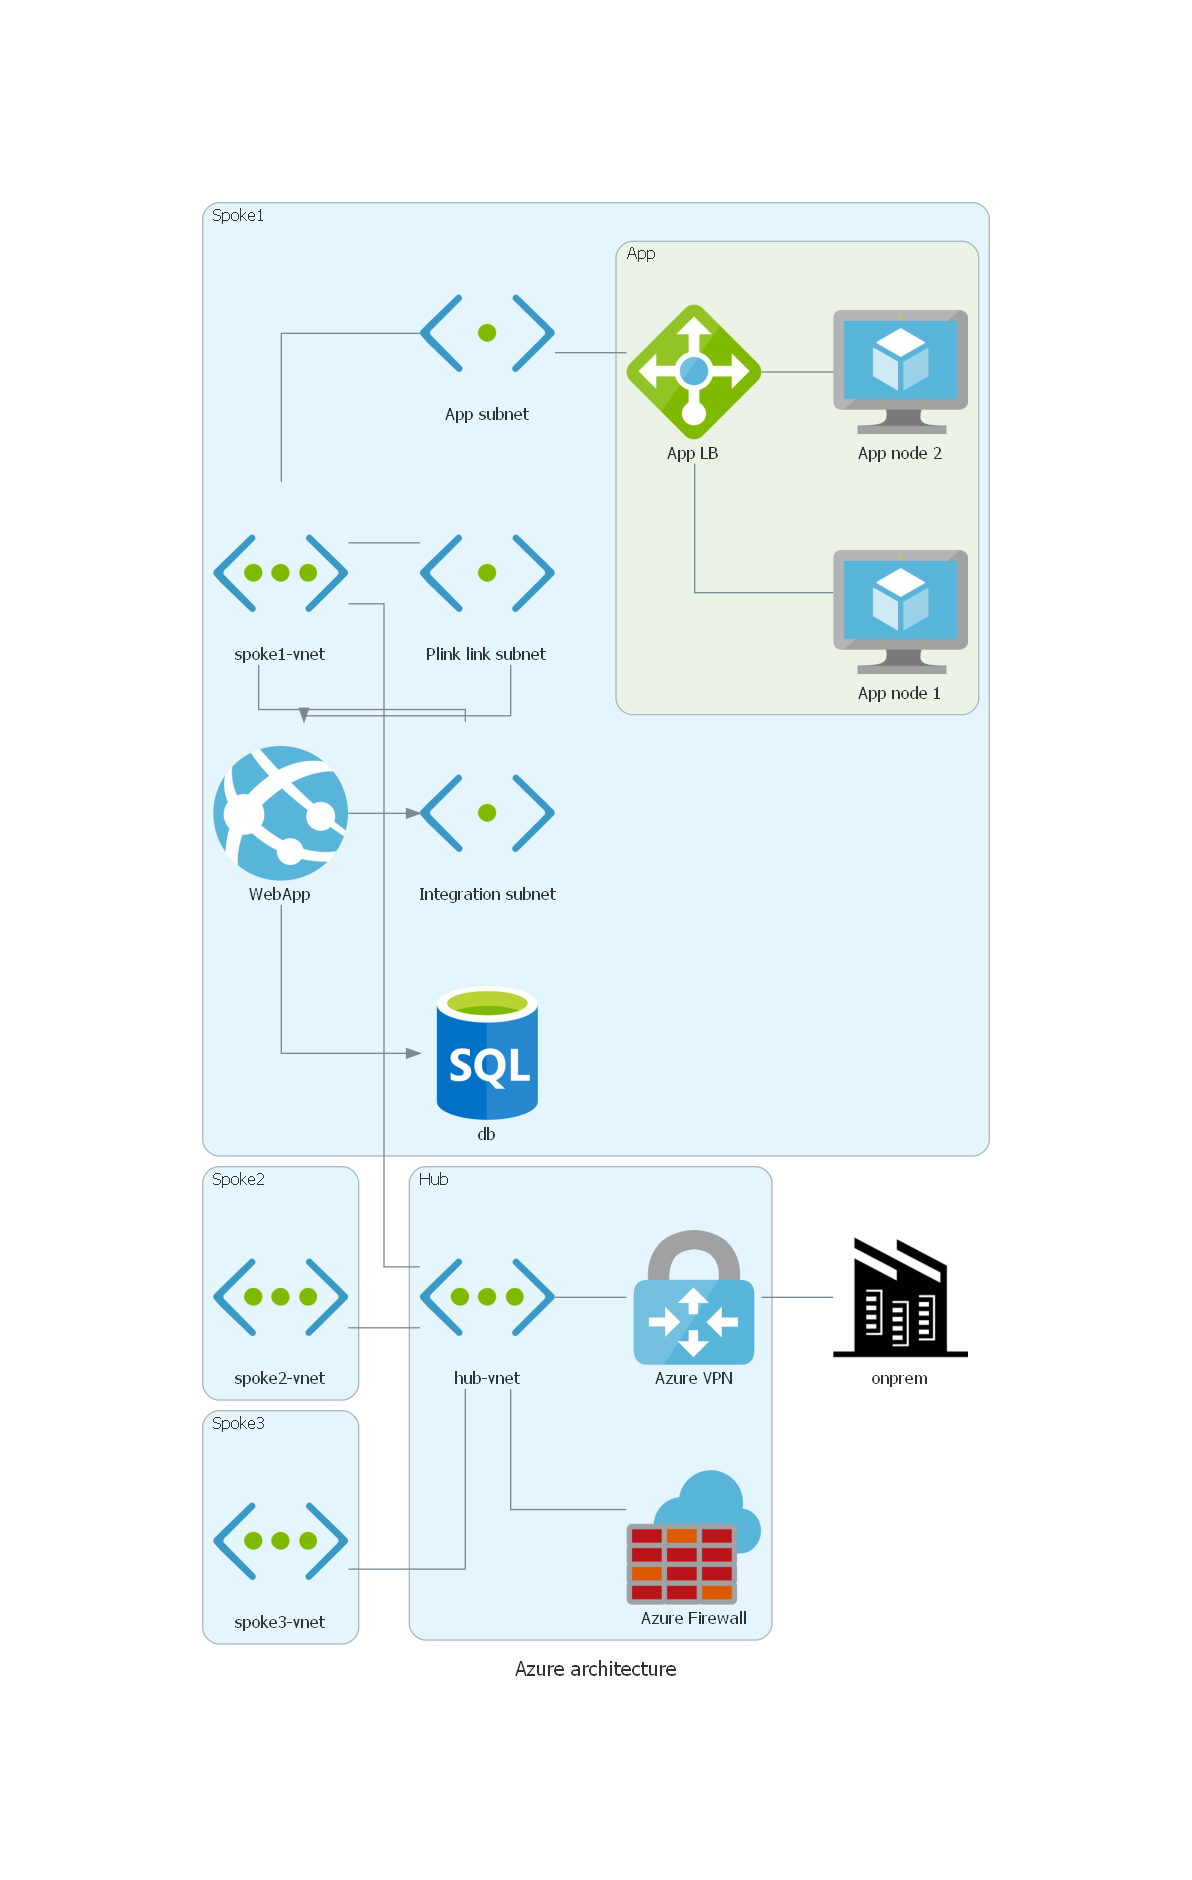

In [48]:
from diagrams import Diagram, Cluster
from diagrams.aws.compute import EC2
import diagrams.azure.network as net
import diagrams.azure.compute as compute
import diagrams.azure.web as web
import diagrams.azure.database as db
from diagrams.generic.place import Datacenter as dc

with Diagram("Azure architecture") as diag:

    with Cluster("Hub"):
        hubvnet = net.VirtualNetworks("hub-vnet") 
        firewall = net.Firewall("Azure Firewall")
        vpn = net.VirtualNetworkGateways("Azure VPN")
        hubvnet - firewall
        hubvnet - vpn
        
    vpn - dc("onprem")

    with Cluster("Spoke1"):
        spoke1vnet = net.VirtualNetworks("spoke1-vnet") 
        spoke1vnet - hubvnet
        spoke1subApp = net.Subnets("App subnet")
        spoke1subInt = net.Subnets("Integration subnet")
        spoke1subPL = net.Subnets("Plink link subnet")
        spoke1vnet - [spoke1subApp, spoke1subInt, spoke1subPL]
        with Cluster("App"):
            spoke1AppVm1 = compute.VM("App node 1")
            spoke1AppVm2 = compute.VM("App node 2")
            spoke1AppLb = net.LoadBalancers("App LB")
        spoke1subApp - spoke1AppLb - [spoke1AppVm1, spoke1AppVm2]
        webApp = web.AppServices("WebApp")
        webApp >> spoke1subInt
        webApp << spoke1subPL
        sql = db.SQLDatabases("db")
        webApp >> sql

    with Cluster("Spoke2"):
        spoke2vnet = net.VirtualNetworks("spoke2-vnet") 
        spoke2vnet - hubvnet
    with Cluster("Spoke3"):
        spoke3vnet = net.VirtualNetworks("spoke3-vnet") 
        spoke3vnet - hubvnet

diag